# Séries temporais com Keras

### Bibliotecas básicas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 18

## Carregando os dados

In [4]:
passageiros = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alura/Passageiros.csv')
print(passageiros.shape)
passageiros.head()

(144, 2)


,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


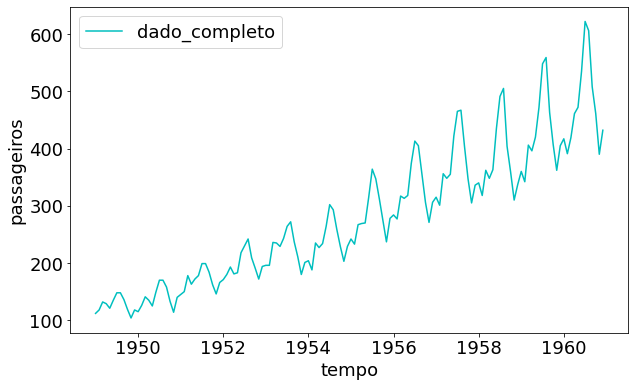

In [5]:
sns.lineplot(x='tempo',y='passageiros', data=passageiros,label='dado_completo', color='c')
plt.show() 

## Escalando os dados

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(passageiros)
dado_escalado = sc.transform(passageiros)

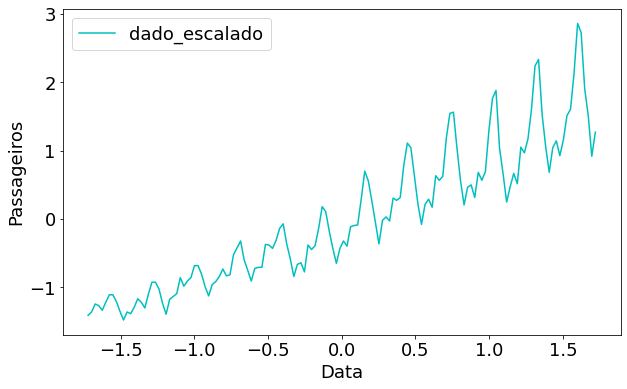

In [7]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

sns.lineplot(x=x, y=y, label='dado_escalado', color='c') 
plt.ylabel('Passageiros')
plt.xlabel('Data')
plt.show()

## Dividindo em treino e teste

In [8]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros)-tamanho_treino

xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

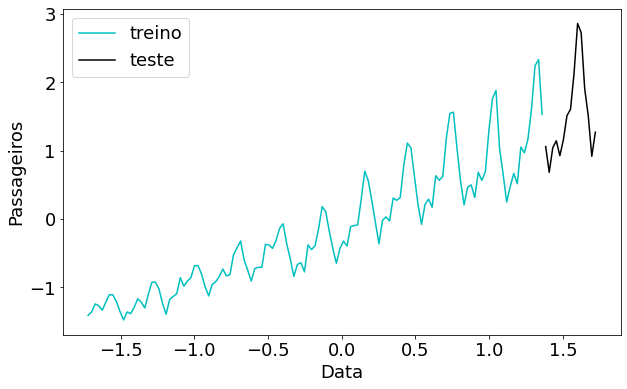

In [9]:
sns.lineplot(x=xtreino, y=ytreino, label='treino', color='c') 
sns.lineplot(x=xteste, y=yteste, label='teste', color='k') 
plt.ylabel('Passageiros')
plt.xlabel('Data')
plt.show()

## Regressão Linear

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

regressor = Sequential()
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', activation='linear',use_bias=False))
regressor.compile(loss='mean_squared_error',optimizer='adam')
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [11]:
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 0s 2ms/step - loss: 0.1194


In [12]:
y_predict = regressor.predict(xtreino)

d = {'tempo': xtreino, 'passageiros': y_predict[:,0]}
resultados = pd.DataFrame(data=d)
resultado_transf = sc.inverse_transform(resultados)
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo','passageiros']

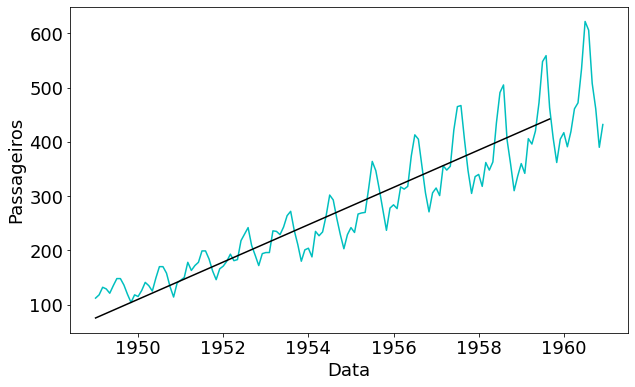

In [13]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, color='c')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, color='k')
plt.ylabel('Passageiros')
plt.xlabel('Data')
plt.show()

#### Prevendo os dados de teste (o futuro)

In [14]:
y_predict_teste= regressor.predict(xteste)

d = {'tempo': xteste, 'passageiros': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)
resultado_transf_teste = sc.inverse_transform(resultados_teste)
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['tempo','passageiros']

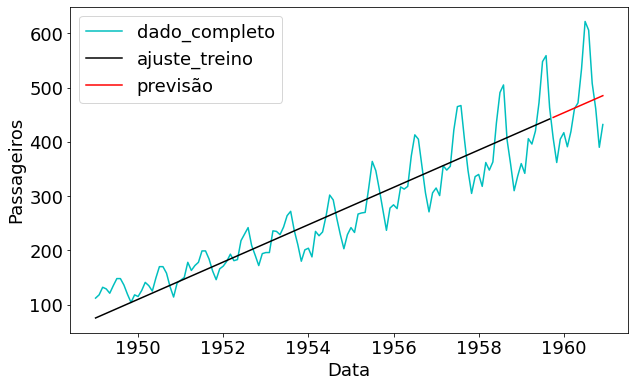

In [15]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo', color='c')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino', color='k')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf_teste, label='previsão', color='r')
plt.ylabel('Passageiros')
plt.xlabel('Data')
plt.show()

## Regressão não-linear

In [16]:
regressor2 = Sequential()
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False)) 
regressor2.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor2.compile(loss='mean_squared_error',optimizer='adam')
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [17]:
regressor2.fit(xtreino,ytreino,epochs =500)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8026
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8322
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8106
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7661
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8003
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8248
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7706
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8020
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7570
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8209
Epoch 11/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7597
Epoch 12/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8419
Epoch 13/500
5/5 [==============================] - 0s 2ms/st

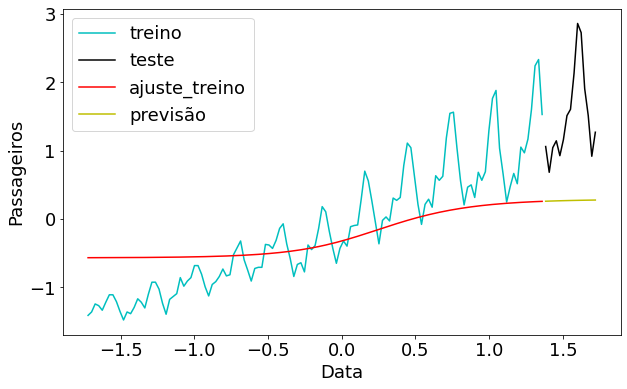

In [18]:
y_predict = regressor2.predict(xtreino)
y_predict_teste = regressor2.predict(xteste)

sns.lineplot(x=xtreino, y=ytreino, label='treino', color='c')
sns.lineplot(x=xteste, y=yteste, label='teste', color='k')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino', color='r')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsão', color='y')
plt.ylabel('Passageiros')
plt.xlabel('Data')
plt.show()

### Reformulando o problema

In [19]:
def separa_dados(vetor, n_passos):
  X_novo = []
  y_novo = []

  for i in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo

In [20]:
vetor = pd.DataFrame(ytreino)[0]
xtreino_novo, ytreino_novo = separa_dados(vetor, 1)

vetor2 = pd.DataFrame(yteste)[0]
xteste_novo, yteste_novo = separa_dados(vetor2, 1)

In [21]:
regressor3 = Sequential()
regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear',use_bias=False)) 
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor3.compile(loss='mean_squared_error',optimizer='adam')
regressor3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 64        
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [22]:
regressor3.fit(xtreino_novo, ytreino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7481
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7299
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7493
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7253
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6443
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6428
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6472
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6162
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6226
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6454
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5310
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5363
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

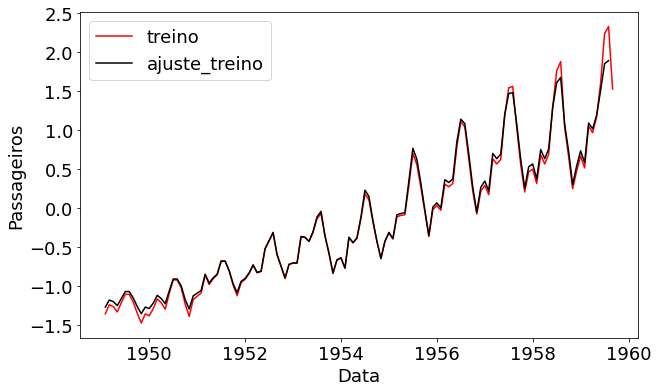

In [23]:
y_predict_novo = regressor3.predict(xtreino_novo)

sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino', color='r')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino', color='k')
plt.ylabel('Passageiros')
plt.xlabel('Data')
plt.show()

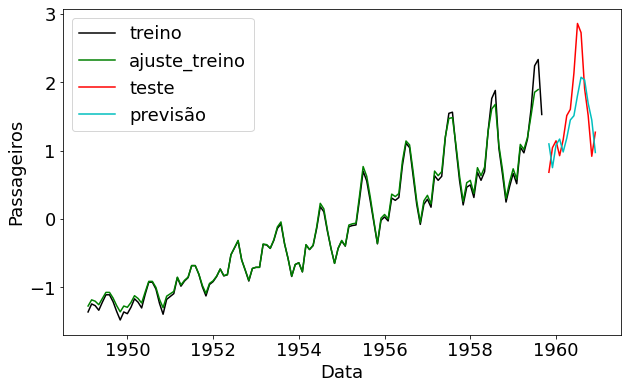

In [24]:
y_predict_teste_novo = regressor3.predict(xteste_novo)
resultado = pd.DataFrame(y_predict_teste_novo)[0]

sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino', color='k')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino', color='g')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[130:144], label='teste', color='r')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label='previsão', color='c')
plt.ylabel('Passageiros')
plt.xlabel('Data')
plt.show()

### Janelas

In [25]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 4)
xteste_novo, yteste_novo = separa_dados(vetor2, 4)

regressor4 = Sequential()
regressor4.add(Dense(8, input_dim=4, kernel_initializer='ones', activation='linear',use_bias=False)) 
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False))
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor4.compile(loss='mean_squared_error',optimizer='adam')
regressor4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_8 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 64        
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [26]:
regressor4.fit(xtreino_novo, ytreino_novo, epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 3ms/step - loss: 0.8359
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7656
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6466
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7175
Epoch 5/300
4/4 [==============================] - 0s 2ms/step - loss: 0.5559
Epoch 6/300
4/4 [==============================] - 0s 2ms/step - loss: 0.4912
Epoch 7/300
4/4 [==============================] - 0s 2ms/step - loss: 0.4466
Epoch 8/300
4/4 [==============================] - 0s 2ms/step - loss: 0.3499
Epoch 9/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2790
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2316
Epoch 11/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1963
Epoch 12/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1793
Epoch 13/300
4/4 [==============================] - 0s 2ms/st

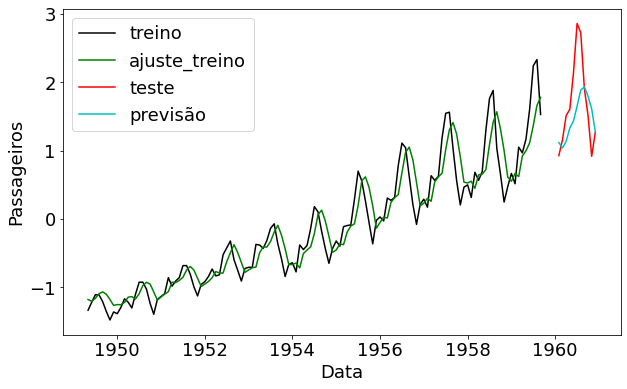

In [27]:
y_predict_novo = regressor4.predict(xtreino_novo)
resultado_treino = pd.DataFrame(y_predict_novo)[0]

y_predict_teste_novo = regressor4.predict(xteste_novo)
resultado = pd.DataFrame(y_predict_teste_novo)[0]

sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[4:129], label='treino', color='k')
sns.lineplot(x='tempo', y=resultado_treino.values, data=passageiros[4:129], label='ajuste_treino', color='g')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[133:144], label='teste', color='r')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[133:144], label='previsão', color='c')
plt.ylabel('Passageiros')
plt.xlabel('Data')
plt.show()

# Novo problema

### Carrega a base de dados

In [28]:
bike = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alura/bicicletas.csv')
bike['datas'] = pd.to_datetime(bike['datas'])
print(bike.shape)
bike.head()

(17414, 10)


,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### Visualizando os dados

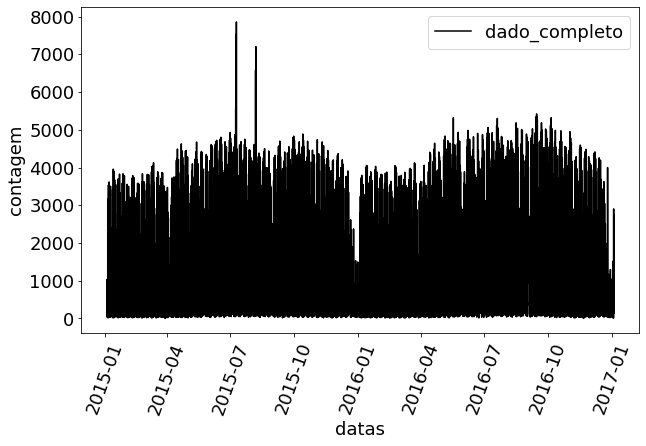

In [29]:
sns.lineplot(x='datas',y='contagem', data=bike,label='dado_completo', color='k')
plt.xticks(rotation=70)
plt.show() 

### Escalando os dados

In [30]:
sc2 = StandardScaler()
sc2.fit(bike['contagem'].values.reshape(-1,1))
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

### Divisão dos dados

In [31]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike)-tamanho_treino

ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

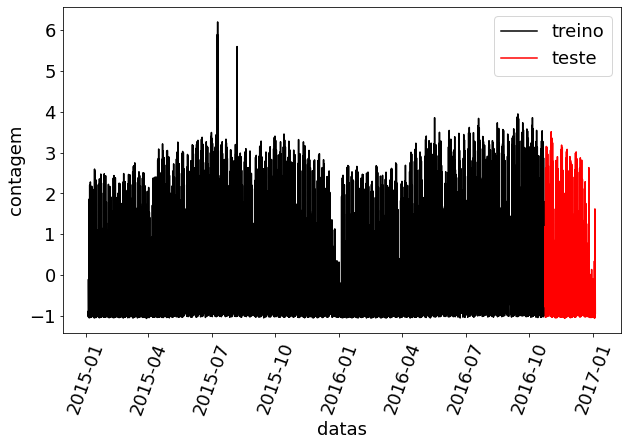

In [38]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino', color='k')
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste', color='r') 
plt.ylabel('contagem')
plt.xticks(rotation=70)
plt.show()

### Preparação dos dados

In [39]:
vetor = pd.DataFrame(ytreino)[0]
xtreino_novo, ytreino_novo = separa_dados(vetor, 10)

vetor2 = pd.DataFrame(yteste)[0]
xteste_novo, yteste_novo = separa_dados(vetor2, 10)

### Redes neurais recorrentes

In [46]:
from tensorflow.keras.layers import LSTM

xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0], xtreino_novo.shape[1], 1))
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0], xteste_novo.shape[1], 1))

recorrente = Sequential()
recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')
recorrente.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [52]:
resultado = recorrente.fit(xtreino_novo,ytreino_novo, validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0161 - val_loss: 0.0167
Epoch 2/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0161 - val_loss: 0.0147
Epoch 3/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0160 - val_loss: 0.0157
Epoch 4/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0159 - val_loss: 0.0161
Epoch 5/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0158 - val_loss: 0.0149
Epoch 6/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0157 - val_loss: 0.0158
Epoch 7/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0155 - val_loss: 0.0176
Epoch 8/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0154 - val_loss: 0.0145
Epoch 9/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0154 - val_loss: 0.0144
Epoch 10/100
490/490 [==============================] - 5s 10ms/step - loss: 0.015

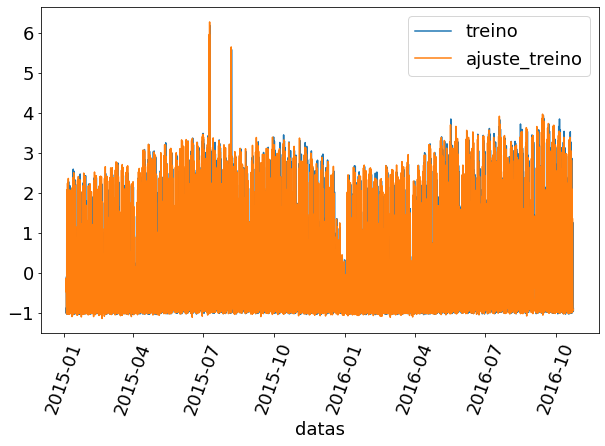

In [54]:
y_ajustado = recorrente.predict(xtreino_novo)

sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0],data=bike[0:15662],label='ajuste_treino')
plt.xticks(rotation=70) 
plt.show()

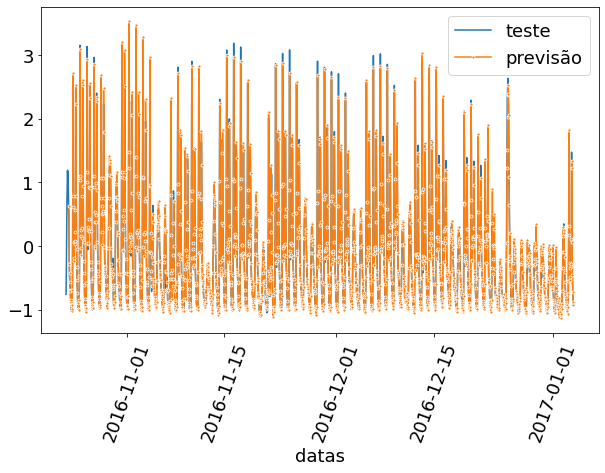

In [55]:
y_predito = recorrente.predict(xteste_novo)

sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
sns.lineplot(x='datas',y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.',label='previsão')
plt.xticks(rotation=70)
plt.show()

### GRU

In [56]:
from tensorflow.keras.layers import GRU

recorrente_g = Sequential()
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])))
recorrente_g.add(Dense(units=1))
recorrente_g.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente_g.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128)               50304     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [57]:
resultado2 = recorrente_g.fit(xtreino_novo,ytreino_novo, validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 [==============================] - 6s 9ms/step - loss: 0.3778 - val_loss: 0.0496
Epoch 2/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0663 - val_loss: 0.0385
Epoch 3/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0523 - val_loss: 0.0297
Epoch 4/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0413 - val_loss: 0.0265
Epoch 5/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0364 - val_loss: 0.0376
Epoch 6/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0365 - val_loss: 0.0221
Epoch 7/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0324 - val_loss: 0.0226
Epoch 8/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0348 - val_loss: 0.0199
Epoch 9/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0364 - val_loss: 0.0197
Epoch 10/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0325 - val_lo

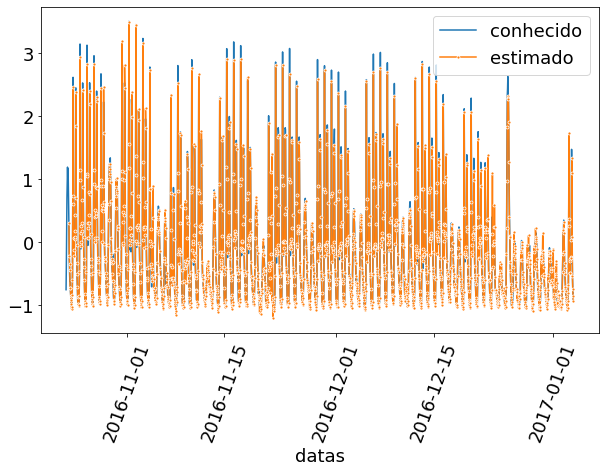

In [58]:
y_predito2 = recorrente_g.predict(xteste_novo)

sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)])
sns.lineplot(x='datas',y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.')
plt.legend(['conhecido','estimado'])
plt.xticks(rotation=70)
plt.show()

### Avaliando o resultado

In [59]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


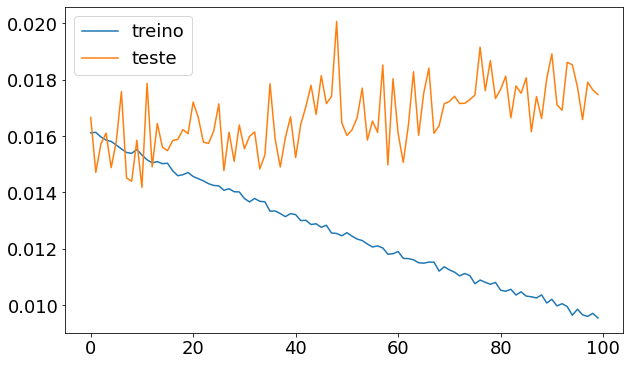

In [60]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino','teste'])
plt.show()

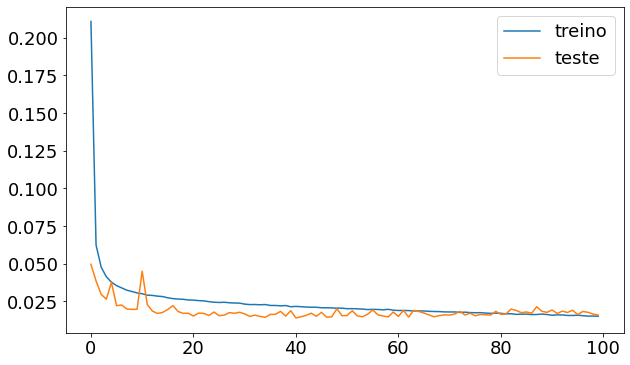

In [61]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino','teste'])
plt.show()